In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time","dir_o"],
                          parse_dates=["time"]).set_index("time")
station["dir_o"].describe()

count    41350.000000
mean       160.983990
std        115.183827
min         -1.000000
25%         20.000000
50%        200.000000
75%        240.000000
max        360.000000
Name: dir_o, dtype: float64

In [5]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-1.5, -0.5),(-0.5,20), (20, 40), (40, 60),
                                           (60,80),(80,100),(100,120),(120,140),(140,160),
                                           (160,180),(180,200),(200,220),(220,240),
                                           (240,260),(260,280),(280,300),(300,320),
                                           (320,340),(340,360)])
labels = ['VRB', '[0, 20]', '(20, 40]', '(40, 60]','(60, 80]', '(80, 100]',
          '(100, 120]', '(120, 140]','(140, 160]', '(160, 180]', '(180, 200]',
          '(200, 220]','(220, 240]', '(240, 260]', '(260, 280]', '(280, 300]',
          '(300, 320]', '(320, 340]', '(340, 360]']

station["dir_l"] = pd.cut(station["dir_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

station["dir_l"].value_counts(normalize= True)

VRB           0.180459
(180, 200]    0.148198
(200, 220]    0.103748
(220, 240]    0.084450
[0, 20]       0.083096
(260, 280]    0.075139
(240, 260]    0.068779
(160, 180]    0.065659
(20, 40]      0.044474
(340, 360]    0.043700
(280, 300]    0.025780
(40, 60]      0.020532
(300, 320]    0.019299
(320, 340]    0.017074
(60, 80]      0.006675
(80, 100]     0.005683
(140, 160]    0.003313
(100, 120]    0.002636
(120, 140]    0.001306
Name: dir_l, dtype: float64

**Forecast D1**

In [6]:
#forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,8.171858,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,8.045405,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,7.194441,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,7.239085,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,6.878137,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,28.299652,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,27.654913,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,30.302912,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [7]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k

,dir_o,dir_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,280.0,"(260, 280]",325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,...,0.0,0.000000e+00,0.142531,0.0,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 02:00:00,0.0,"[0, 20]",351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,...,0.0,-8.593750e-07,0.061034,0.0,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,0.0,"[0, 20]",33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,...,0.0,0.000000e+00,0.065096,0.0,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,240.0,"(220, 240]",164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,...,0.0,-2.343750e-09,0.085678,0.0,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
2019-01-02 05:00:00,220.0,"(200, 220]",172.277390,0.0,1675.816650,0.444178,0.813525,103278.773438,279.637054,0.811063,...,0.0,6.640625e-06,0.108834,0.0,0.0,0.108834,5723.016113,1601.333618,253.504395,281.562134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 19:00:00,40.0,"(20, 40]",15.196351,0.0,1130.906982,4.987753,11.324133,102787.117188,280.919373,0.870596,...,0.0,6.250000e-05,0.000000,0.0,0.0,0.000000,5537.417480,1531.997803,247.842743,273.755432
2020-12-24 20:00:00,-1.0,VRB,16.350925,0.0,1122.497314,5.154222,11.432768,102946.109375,280.681763,0.848550,...,0.0,-1.875000e-03,0.000000,0.0,0.0,0.000000,5535.646484,1534.440552,248.129868,273.678802
2020-12-24 21:00:00,60.0,"(40, 60]",14.447461,0.0,1130.548462,5.296582,11.482006,102860.429688,280.298004,0.850470,...,0.0,1.171875e-03,0.000000,0.0,0.0,0.000000,5539.025391,1538.744385,248.260315,273.823364


In [8]:
#label meteorological model prec points 0 to 1
df_all1k["dir0_l"] = pd.cut(df_all1k["dir0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all1k["dir1_l"] = pd.cut(df_all1k["dir1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
df_all1k = df_all1k.drop(columns=["dir_o"])
df_all1k[["dir_l","dir0_l","dir1_l"]].sample(20)

,dir_l,dir0_l,dir1_l
time,,,
2020-05-18 12:00:00,VRB,"(260, 280]","(260, 280]"
2020-06-01 00:00:00,VRB,"(280, 300]","(260, 280]"
2019-01-26 03:00:00,"(180, 200]","(160, 180]","(160, 180]"
2020-08-14 12:00:00,"(260, 280]","(280, 300]","(260, 280]"
2019-08-13 11:00:00,VRB,"(220, 240]","(220, 240]"
2019-07-22 16:00:00,"(260, 280]","(260, 280]","(260, 280]"
2020-10-01 06:00:00,"(240, 260]","(280, 300]","(280, 300]"
2019-11-04 02:00:00,"(200, 220]","(240, 260]","(240, 260]"
2020-09-29 21:00:00,"(320, 340]","(260, 280]","(260, 280]"


**meteorological model score point 0**

****

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



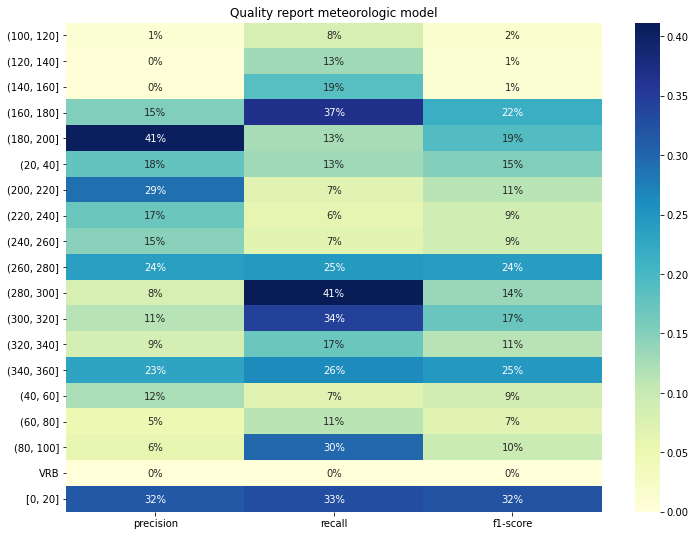

In [9]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
cr=pd.DataFrame(classification_report(df_all1k.dir_l, df_all1k.dir0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

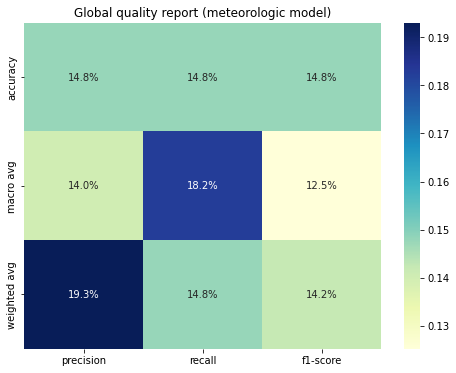

In [10]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

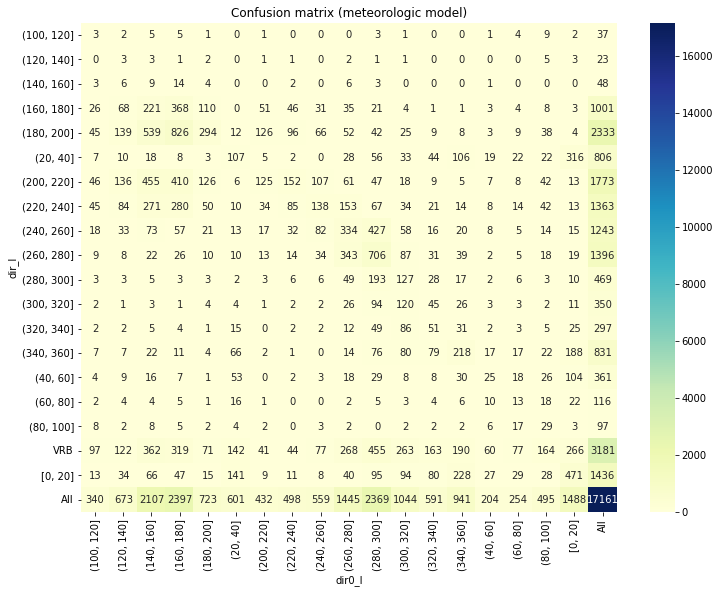

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")

global_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

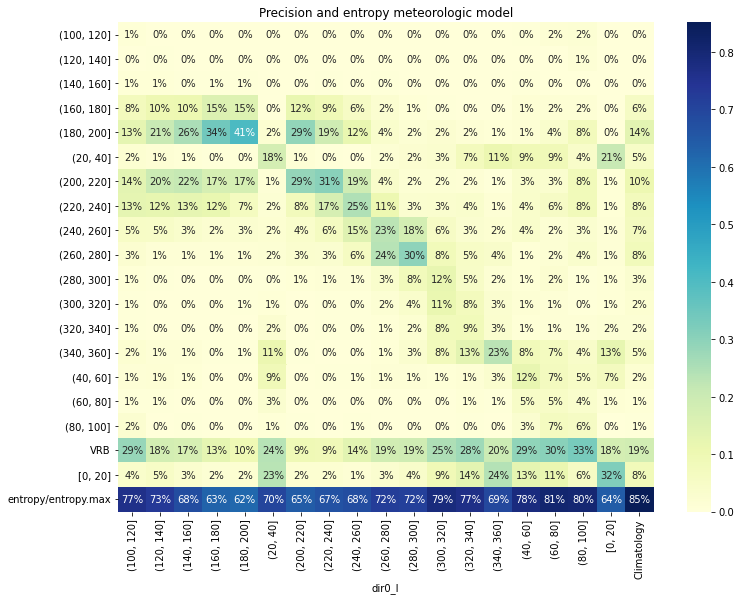

In [12]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc = pd.crosstab(df_all1k.dir_l, df_all1k.dir0_l, margins=True,normalize="columns")
column_sc = column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [13]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.dir_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [10:35<00:00, 21.93s/it]


In [14]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.38,0.26,None,0.37,4.75
RandomForestClassifier,0.38,0.24,None,0.37,10.12
LabelSpreading,0.30,0.24,None,0.30,19.80
LabelPropagation,0.30,0.24,None,0.30,9.16
LGBMClassifier,0.38,0.23,None,0.36,19.56
XGBClassifier,0.36,0.22,None,0.33,75.91
KNeighborsClassifier,0.30,0.22,None,0.30,1.62
BaggingClassifier,0.32,0.21,None,0.31,7.97
ExtraTreeClassifier,0.26,0.19,None,0.26,0.22



Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
(100, 120]         0.00    0.00      0.00     5.00
(120, 140]         0.00    0.00      0.00     1.00
(140, 160]         0.00    0.00      0.00     8.00
(160, 180]         0.38    0.21      0.27   161.00
(180, 200]         0.47    0.58      0.52   367.00
(20, 40]           0.35    0.18      0.24   130.00
(200, 220]         0.37    0.34      0.35   271.00
(220, 240]         0.39    0.34      0.36   211.00
(240, 260]         0.29    0.25      0.27   179.00
(260, 280]         0.47    0.44      0.45   222.00
(280, 300]         0.29    0.16      0.20    63.00
(300, 320]         0.29    0.13      0.18    46.00
(320, 340]         0.50    0.15      0.23    40.00
(340, 360]         0.44    0.32      0.37   119.00
(40, 60]           0.20    0.06      0.09    51.00
(60, 80]           0.00    0.00      0.00    13.00
(80, 100]          0.25    0.08      0.

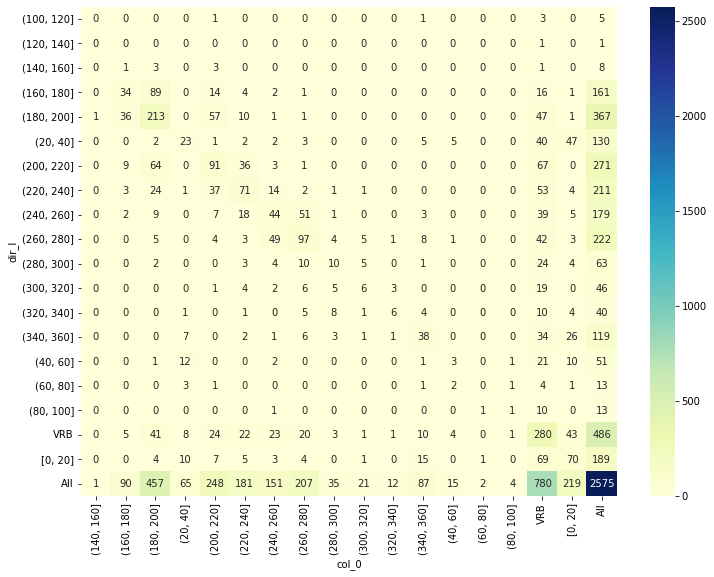

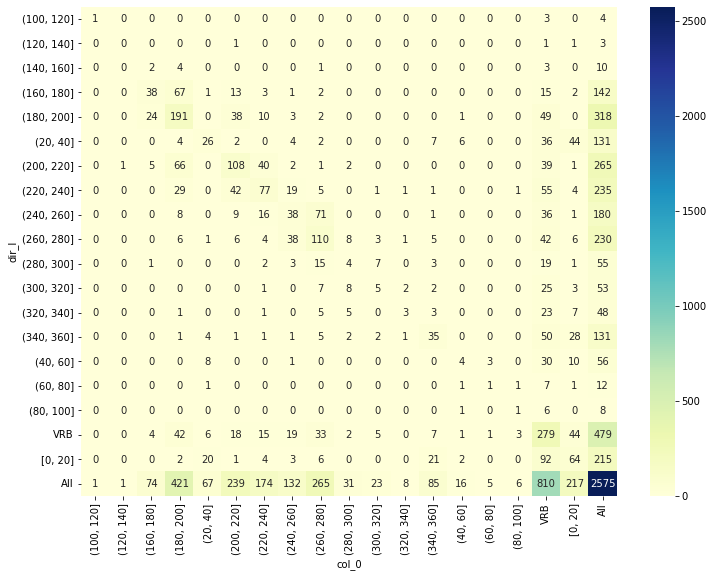

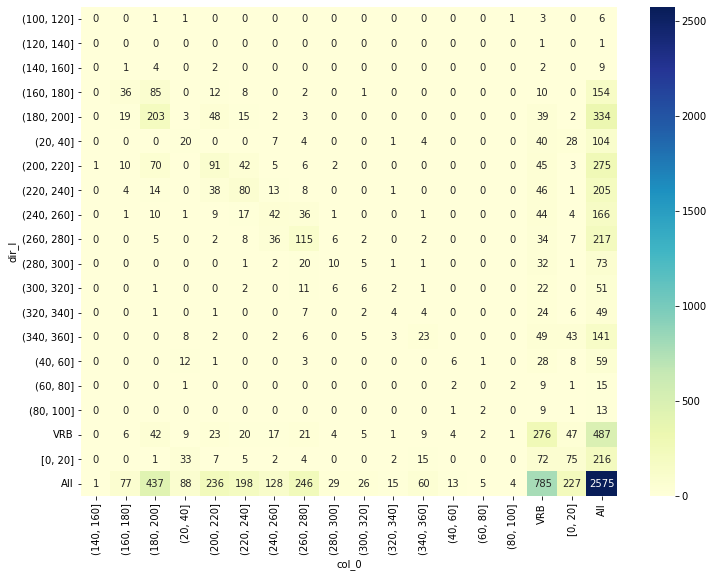

In [15]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = df_all1k.drop(columns=["dir_l","dir0_l","dir1_l"]).columns.to_list()  

# X and Y
Y = df_all1k.dir_l
X = df_all1k[x_var]

# loop ranadom

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  #X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)


  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

In [16]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear


Matriz de Confusión  (Machine Learning)


Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
(100, 120]         0.00    0.00      0.00     5.00
(120, 140]         0.00    0.00      0.00     6.00
(140, 160]         0.00    0.00      0.00     7.00
(160, 180]         0.37    0.21      0.27   154.00
(180, 200]         0.49    0.57      0.53   371.00
(20, 40]           0.38    0.17      0.24   127.00
(200, 220]         0.43    0.45      0.44   260.00
(220, 240]         0.42    0.33      0.37   203.00
(240, 260]         0.31    0.24      0.27   180.00
(260, 280]         0.46    0.46      0.46   216.00
(280, 300]         0.39    0.21      0.28    71.00
(300, 320]         0.45    0.12      0.20    72.00
(320, 340]         0.35    0.15      0.21    48.00
(340, 360]         0.39    0.27      0.32   129.00
(40, 60]           0.14    0.07      0.09    45.00
(60, 80]           0.33    0.15      0.21    13.00
(80, 100]          0.33    0.06      0.

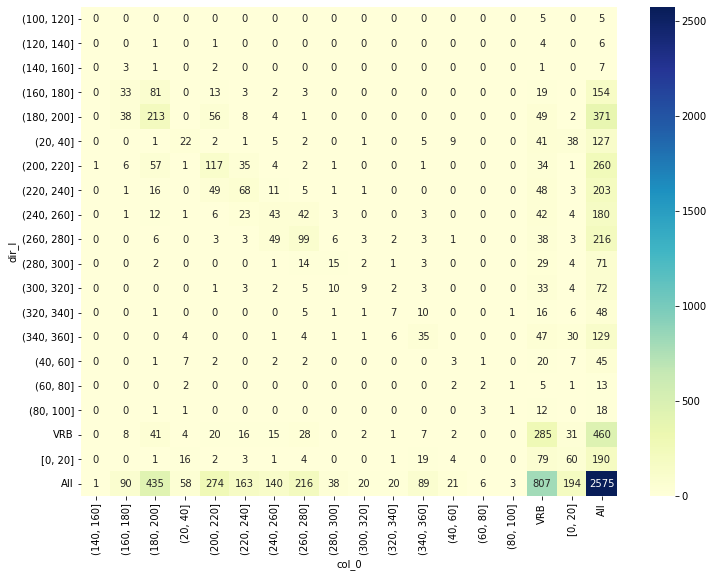

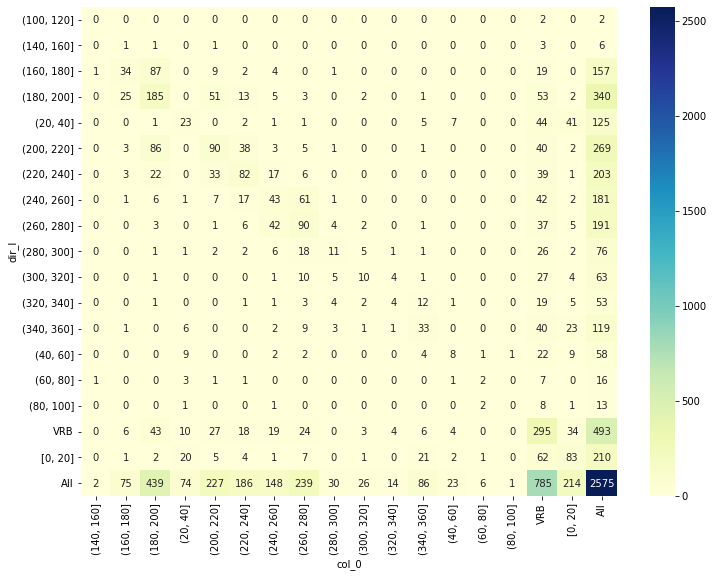

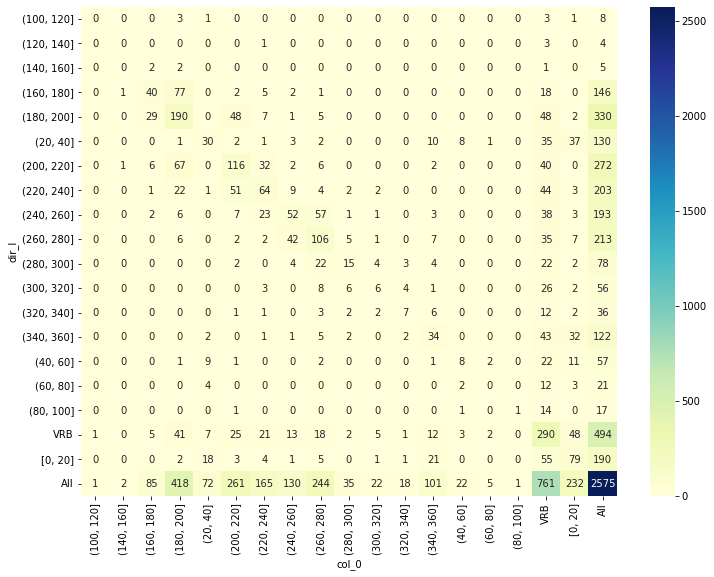

In [17]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.dir_l
X = df_all1k.iloc[:,1:].drop(columns=["dir0_l","dir1_l"])

# loop ranadom

for t in range (0,3):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  plt.figure(figsize=(12, 9))
  sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

In [18]:
X.columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [19]:
import pickle
from sklearn.pipeline import Pipeline

x_var = X.columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":x_var,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("dir_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
